<a href="https://colab.research.google.com/github/msam13/TwitterFakeID-Detection/blob/main/twitterSVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import svm
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier

#Load dataset
twit = pd.read_csv(r"/content/mainDataSet.csv")
print(twit)
twit.cov()

     has_name  username_length  fr/fw round  has_profile  has_image  label
0           1               13        1.000            1          1      1
1           1                9        0.000            1          1      1
2           1               13        0.031            1          1      1
3           1               10        1.217            1          1      1
4           1               15        0.957            1          1      1
..        ...              ...          ...          ...        ...    ...
994         1                9        0.988            1          0      0
995         1                8        0.608            1          1      0
996         1                8        0.085            1          0      0
997         1               11        0.096            1          1      0
998         1               12        0.018            1          1      0

[999 rows x 6 columns]


,has_name,username_length,fr/fw round,has_profile,has_image,label
has_name,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
username_length,0.0,6.873858,0.026201,-0.026897,0.033349,0.000910
fr/fw round,0.0,0.026201,0.292311,0.002431,0.000339,0.000353
has_profile,0.0,-0.026897,0.002431,0.027270,0.002353,0.000014
has_image,0.0,0.033349,0.000339,0.002353,0.198794,0.028694
label,0.0,0.000910,0.000353,0.000014,0.028694,0.250250


In [ ]:
twit.describe()

,has_name,username_length,fr/fw round,has_profile,has_image,label
count,999.0,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1.0,11.184184,0.295930,0.971972,0.726727,0.500501
std,0.0,2.621804,0.540658,0.165136,0.445863,0.500250
min,1.0,4.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,9.000000,0.016000,1.000000,0.000000,0.000000
50%,1.0,11.000000,0.090000,1.000000,1.000000,1.000000
75%,1.0,13.000000,0.360000,1.000000,1.000000,1.000000
max,1.0,15.000000,4.495000,1.000000,1.000000,1.000000


In [ ]:
twit.corr()

,has_name,username_length,fr/fw round,has_profile,has_image,label
has_name,NaN,NaN,NaN,NaN,NaN,NaN
username_length,NaN,1.000000,0.018484,-0.062124,0.028529,0.000694
fr/fw round,NaN,0.018484,1.000000,0.027227,0.001404,0.001304
has_profile,NaN,-0.062124,0.027227,1.000000,0.031959,0.000170
has_image,NaN,0.028529,0.001404,0.031959,1.000000,0.128648
label,NaN,0.000694,0.001304,0.000170,0.128648,1.000000


In [ ]:
# print the names of the 13 features
print("Features: ", twit.columns)
# print the label type of twit('malignant' 'benign')
print("Labels: ", twit.label)


Features:  Index(['has_name', 'username_length', 'fr/fw round', 'has_profile',
       'has_image', 'label'],
      dtype='object')
Labels:  0      1
1      1
2      1
3      1
4      1
      ..
994    0
995    0
996    0
997    0
998    0
Name: label, Length: 999, dtype: int64


In [ ]:
twitcopy = twit.copy()
del twitcopy["label"]
print(twitcopy)


     has_name  username_length  fr/fw round  has_profile  has_image
0           1               13        1.000            1          1
1           1                9        0.000            1          1
2           1               13        0.031            1          1
3           1               10        1.217            1          1
4           1               15        0.957            1          1
..        ...              ...          ...          ...        ...
994         1                9        0.988            1          0
995         1                8        0.608            1          1
996         1                8        0.085            1          0
997         1               11        0.096            1          1
998         1               12        0.018            1          1

[999 rows x 5 columns]


In [ ]:
d = {}
for i in range(50,91):
  X_train, X_test, y_train, y_test = train_test_split(twitcopy, twit.label, train_size = i/100)
  clf = svm.SVC(kernel='linear') # Linear Kernel
  s = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  Accuracy = metrics.accuracy_score(y_test, y_pred)
  key = str(i)
  d[key] = Accuracy

for pair in d.items():
  print(pair)

('50', 0.456)
('51', 0.5612244897959183)
('52', 0.5541666666666667)
('53', 0.5382978723404256)
('54', 0.5543478260869565)
('55', 0.5666666666666667)
('56', 0.5431818181818182)
('57', 0.5627906976744186)
('58', 0.580952380952381)
('59', 0.526829268292683)
('60', 0.565)
('61', 0.5307692307692308)
('62', 0.5368421052631579)
('63', 0.5513513513513514)
('64', 0.5166666666666667)
('65', 0.5914285714285714)
('66', 0.5294117647058824)
('67', 0.5696969696969697)
('68', 0.546875)
('69', 0.5709677419354838)
('70', 0.5066666666666667)
('71', 0.5655172413793104)
('72', 0.5321428571428571)
('73', 0.5777777777777777)
('74', 0.5807692307692308)
('75', 0.536)
('76', 0.5291666666666667)
('77', 0.5173913043478261)
('78', 0.5181818181818182)
('79', 0.5904761904761905)
('80', 0.545)
('81', 0.5368421052631579)
('82', 0.5944444444444444)
('83', 0.5941176470588235)
('84', 0.54375)
('85', 0.64)
('86', 0.55)
('87', 0.46153846153846156)
('88', 0.5333333333333333)
('89', 0.4909090909090909)
('90', 0.53)


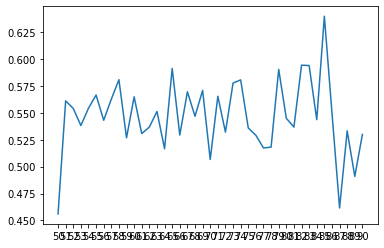

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(d.keys()),list(d.values()))
plt.show()

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.488
Precision: 0.4897959183673469
Recall: 0.975609756097561


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier

#Load dataset
twit = pd.read_csv(r"database.csv")
d = {}
for i in range(50,91):
  X_train, X_test, y_train, y_test = train_test_split(twit, twit.label, train_size = i/100)
  clf = svm.SVC(kernel='linear') # Linear Kernel
  s = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  Accuracy = metrics.accuracy_score(y_test, y_pred)
  key = str(i)
  d[key] = Accuracy

for pair in d.items():
  print(pair)

FileNotFoundError: ignored